<a href="https://colab.research.google.com/github/salil82/dx601-final-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

wine_df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz', sep='\t')
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE

wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

YOUR ANSWERS HERE

fixed acidity: non-volatile acids in the wine, which
contribute to the tartness of the wine
volatile acidity: volatile acids in the wine. if it's too high, the wine could be spoiled and taste like vinegar
citric acid: one of the three predominant acids in wine
residual sugar: sugar from the grapes left over after fermenentation
chlorides: amount of salt, sodium chloride, in the wine
free sulfur dioxide: available SO2 in wine to protect against oxidation and spoilage
total sulfur dioxide: free plus bound SO2
density: related to alcohol and sugar content;
pH: acidity of the wine. most wines have a pH between 3-4
sulphates: help preserve the wine
alcohol: alcohol content of the wine, usually measured by volume
target: wine quality on a scale of 0 to 10

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

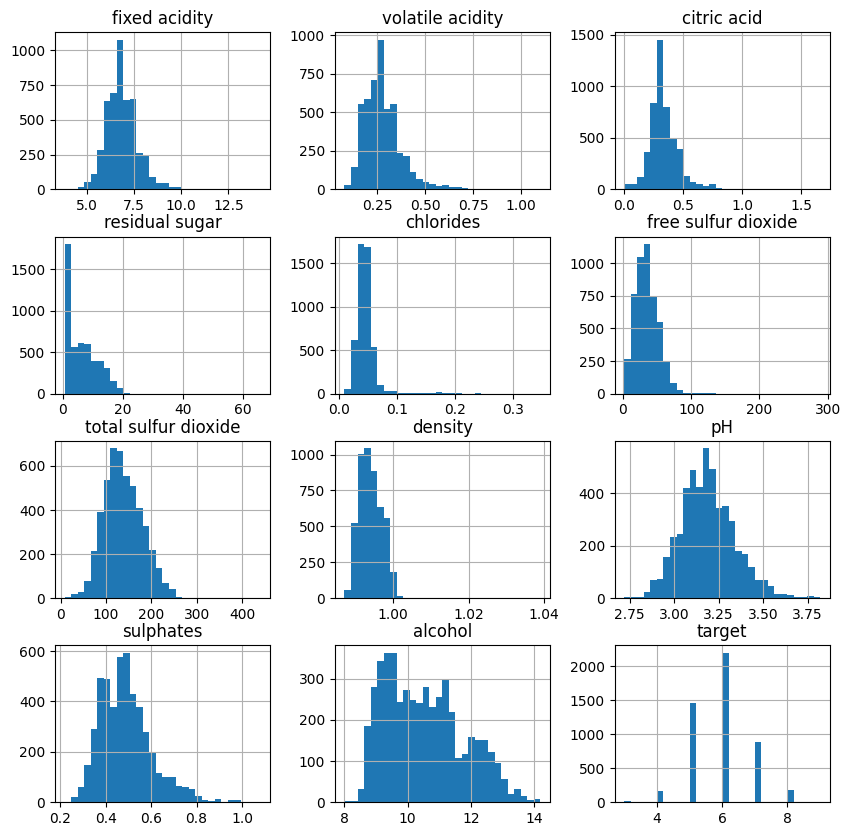

In [15]:
# YOUR CODE HERE

wine_df.hist(bins=30, figsize=(10, 10))
plt.show()

YOUR ANSWERS HERE

YOUR ANSWERS HERE

### Problem 3 Answers: Best Matching Distributions

Based on the histograms generated for each column, here are the distributions that I think best match each column:

*   **fixed acidity**: Appears to be approximately **Normal (Gaussian)**, possibly with a slight right skew. Its values are concentrated around a central point and spread out symmetrically to some extent.
*   **volatile acidity**: Highly **Right-skewed**, with a long tail to the right. This often resembles a **Log-normal** or **Gamma** distribution, where most values are small but a few are very large.
*   **citric acid**: **Right-skewed**, with a significant peak near zero and values tapering off. This could be indicative of a **Beta** or **Gamma** distribution, or even a mixed distribution.
*   **residual sugar**: Very **Right-skewed**, similar to a **Log-normal** or **Exponential** distribution, with many low values and a few very high ones.
*   **chlorides**: Highly **Right-skewed**, resembling a **Log-normal** or **Exponential** distribution. Most values are very small, indicating low chloride content in most wines.
*   **free sulfur dioxide**: Somewhat **Right-skewed**, but with a more bell-like shape compared to the highly skewed ones. A **Gamma** distribution might fit well, or even a slightly skewed Normal distribution.
*   **total sulfur dioxide**: **Right-skewed**, similar to a **Log-normal** or **Gamma** distribution, indicating that higher levels are less common.
*   **density**: Appears to be approximately **Normal (Gaussian)**, with values clustered around a mean and decreasing symmetrically.
*   **pH**: Appears to be approximately **Normal (Gaussian)**, centered around the typical pH range for wine.
*   **sulphates**: **Right-skewed**, possibly a **Log-normal** or **Gamma** distribution, indicating that most wines have lower sulphate levels.
*   **alcohol**: Appears to be approximately **Normal (Gaussian)**, with a clear central tendency and a spread that roughly follows a bell curve, though with some discrete values due to measurement units.
*   **target**: This is an ordinal categorical variable representing wine quality (scores from 3 to 9). While not a continuous distribution, its histogram shows a central tendency (around 5-7) and a decrease towards the extremes, broadly resembling a **Discrete/Ordinal** distribution that, if treated continuously, would be somewhat like a **Normal** distribution.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again.

This problem depends on material from week 13.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE
# if 11 features, n component is 6?

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
# YOUR CODE HERE
# use z-score? median z-score for each row?
# distances = np.sqrt(pc1**2 + pc2**2)
# index where the max is the row of the outlier. the sample farthest from the center
# Apoorva: z-scores for each column;

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE